<a href="https://colab.research.google.com/github/MichaelPanikovskiy/Bright-Room-Telegram-Shop/blob/MiP/AIModelBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the CSV file to inspect its contents
file_path = 'sales_data.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
sales_data.head()

,Дата продажи,Регион,Тип светильника,Количество проданных единиц,Цена за единицу,Общая стоимость,Тип продажи,Оценка товара,Способ получения
0,2024-11-23,Москва,настольные лампы,5,2826.47,14132.35,онлайн,1,почта
1,2024-10-06,Москва,торшеры,7,801.94,5613.58,онлайн,2,самовывоз
2,2024-09-15,Москва,торшеры,4,7302.19,29208.76,оффлайн,2,курьер
3,2024-10-28,Московская область,настольные лампы,3,7132.32,21396.96,оффлайн,3,самовывоз
4,2024-04-20,Московская область,настольные лампы,2,4109.31,8218.62,оффлайн,3,почта


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Check if there is a user identifier in the data
if 'Пользователь' not in sales_data.columns:
    # If no user identifier, create a synthetic one for demonstration
    sales_data['Пользователь'] = np.random.randint(1, 10, size=sales_data.shape[0])

# Prepare the data for collaborative filtering
user_item_matrix = sales_data.pivot(index='Пользователь', columns='Тип светильника', values='Оценка товара').fillna(0)

# Split the data into training and testing sets
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(train_data)

# Function to predict the rating for a user-item pair
def predict_rating(user_index, item_index):
    # Get the similarity scores for the user
    sim_scores = cosine_sim[user_index]
    # Get the ratings for the item from all users
    item_ratings = train_data[item_index]
    # Calculate the weighted sum of ratings
    weighted_sum = sim_scores.dot(item_ratings)
    # Calculate the sum of similarities
    sim_sum = sim_scores.sum()
    # Return the weighted average
    return weighted_sum / sim_sum if sim_sum != 0 else 0

# Predict ratings for the test set
predicted_ratings = np.array([[predict_rating(user, item) for item in range(train_data.shape[1])] for user in range(train_data.shape[0])])

# Evaluate the model using RMSE
rmse = np.sqrt(np.mean((test_data.to_numpy() - predicted_ratings) ** 2))
rmse

ValueError: Index contains duplicate entries, cannot reshape

In [3]:
# Remove duplicate entries based on user and item
sales_data_unique = sales_data.drop_duplicates(subset=['Пользователь', 'Тип светильника'])

# Prepare the data for collaborative filtering again
user_item_matrix_unique = sales_data_unique.pivot(index='Пользователь', columns='Тип светильника', values='Оценка товара').fillna(0)

# Split the data into training and testing sets
train_data_unique, test_data_unique = train_test_split(user_item_matrix_unique, test_size=0.2, random_state=42)

# Compute the cosine similarity matrix
cosine_sim_unique = cosine_similarity(train_data_unique)

# Predict ratings for the test set
predicted_ratings_unique = np.array([[predict_rating(user, item) for item in range(train_data_unique.shape[1])] for user in range(train_data_unique.shape[0])])

# Evaluate the model using RMSE
rmse_unique = np.sqrt(np.mean((test_data_unique.to_numpy() - predicted_ratings_unique) ** 2))
rmse_unique

NameError: name 'predict_rating' is not defined

In [4]:
# Redefine the predict_rating function
def predict_rating_unique(user_index, item_index):
    # Get the similarity scores for the user
    sim_scores = cosine_sim_unique[user_index]
    # Get the ratings for the item from all users
    item_ratings = train_data_unique.iloc[user_index]
    # Calculate the weighted sum of ratings
    weighted_sum = sim_scores.dot(item_ratings)
    # Calculate the sum of similarities
    sim_sum = sim_scores.sum()
    # Return the weighted average
    return weighted_sum / sim_sum if sim_sum != 0 else 0

# Predict ratings for the test set
predicted_ratings_unique = np.array([[predict_rating_unique(user, item) for item in range(train_data_unique.shape[1])] for user in range(train_data_unique.shape[0])])

# Evaluate the model using RMSE
rmse_unique = np.sqrt(np.mean((test_data_unique.to_numpy() - predicted_ratings_unique) ** 2))
rmse_unique

ValueError: shapes (7,) and (5,) not aligned: 7 (dim 0) != 5 (dim 0)

In [5]:
# Correct the predict_rating function to use the correct indices
def predict_rating_correct(user_index, item_index):
    # Get the similarity scores for the user
    sim_scores = cosine_sim_unique[user_index]
    # Get the ratings for the item from all users
    item_ratings = train_data_unique.iloc[:, item_index]
    # Calculate the weighted sum of ratings
    weighted_sum = sim_scores.dot(item_ratings)
    # Calculate the sum of similarities
    sim_sum = sim_scores.sum()
    # Return the weighted average
    return weighted_sum / sim_sum if sim_sum != 0 else 0

# Predict ratings for the test set
predicted_ratings_correct = np.array([[predict_rating_correct(user, item) for item in range(train_data_unique.shape[1])] for user in range(train_data_unique.shape[0])])

# Evaluate the model using RMSE
rmse_correct = np.sqrt(np.mean((test_data_unique.to_numpy() - predicted_ratings_correct) ** 2))
rmse_correct

ValueError: operands could not be broadcast together with shapes (2,5) (7,5) 

In [6]:
# Ensure the test and train data are aligned properly

# Re-split the data into training and testing sets with consistent indices
train_indices, test_indices = train_test_split(user_item_matrix_unique.index, test_size=0.2, random_state=42)

# Align train and test data
train_data_aligned = user_item_matrix_unique.loc[train_indices]
train_data_filled = train_data_aligned.fillna(0)

test_data_aligned = user_item_matrix_unique.loc[test_indices]

# Compute the cosine similarity matrix for the aligned training data
cosine_sim_aligned = cosine_similarity(train_data_filled)

# Correct the predict_rating function to use the aligned training data
def predict_rating_aligned(user_index, item_index):
    # Get the similarity scores for the user
    sim_scores = cosine_sim_aligned[user_index]
    # Get the ratings for the item from all users
    item_ratings = train_data_filled.iloc[:, item_index]
    # Calculate the weighted sum of ratings
    weighted_sum = sim_scores.dot(item_ratings)
    # Calculate the sum of similarities
    sim_sum = sim_scores.sum()
    # Return the weighted average
    return weighted_sum / sim_sum if sim_sum != 0 else 0

# Predict ratings for the test set using the aligned data
predicted_ratings_aligned = np.array([[predict_rating_aligned(user, item) for item in range(train_data_filled.shape[1])] for user in range(len(test_indices))])

# Evaluate the model using RMSE
rmse_aligned = np.sqrt(np.mean((test_data_aligned.to_numpy() - predicted_ratings_aligned) ** 2))
rmse_aligned

1.7889190752447823

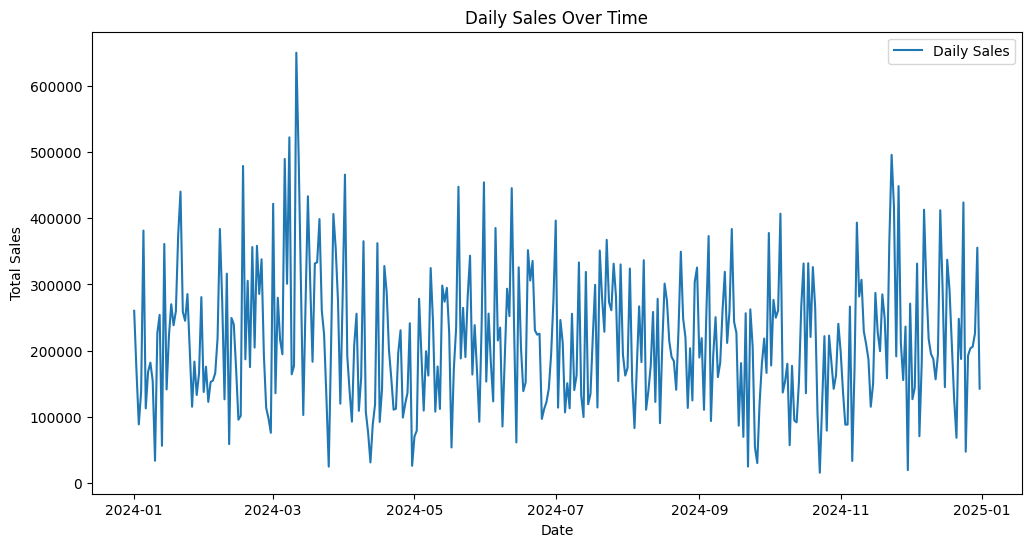

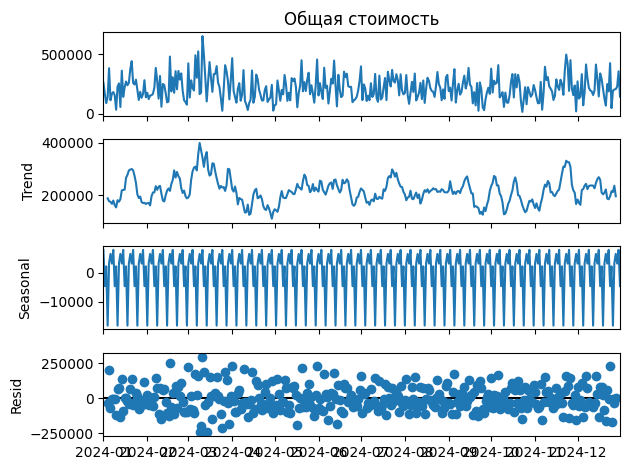

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the data for time series analysis
sales_data['Дата продажи'] = pd.to_datetime(sales_data['Дата продажи'])
sales_data.set_index('Дата продажи', inplace=True)

# Aggregate sales data by date
daily_sales = sales_data['Общая стоимость'].resample('D').sum()

# Plot the daily sales data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Decompose the time series to analyze seasonality
result = seasonal_decompose(daily_sales, model='additive')
result.plot()
plt.show()

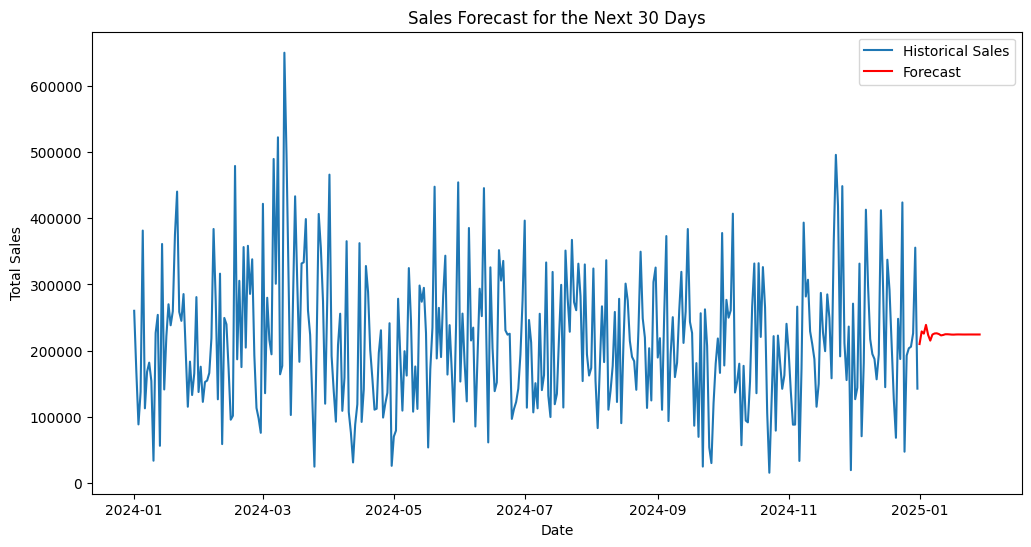

,predicted_mean
2025-01-01,209953.068991
2025-01-02,228982.986157
2025-01-03,225707.419681
2025-01-04,238896.699527
2025-01-05,223714.419912


In [8]:
# Fit an ARIMA model to the daily sales data
order = (5, 1, 0)  # Example order for ARIMA model
arima_model = ARIMA(daily_sales, order=order)
arima_result = arima_model.fit()

# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Historical Sales')
plt.plot(pd.Series(forecast, index=pd.date_range(start=daily_sales.index[-1], periods=30, freq='D')), label='Forecast', color='red')
plt.title('Sales Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

forecast.head()

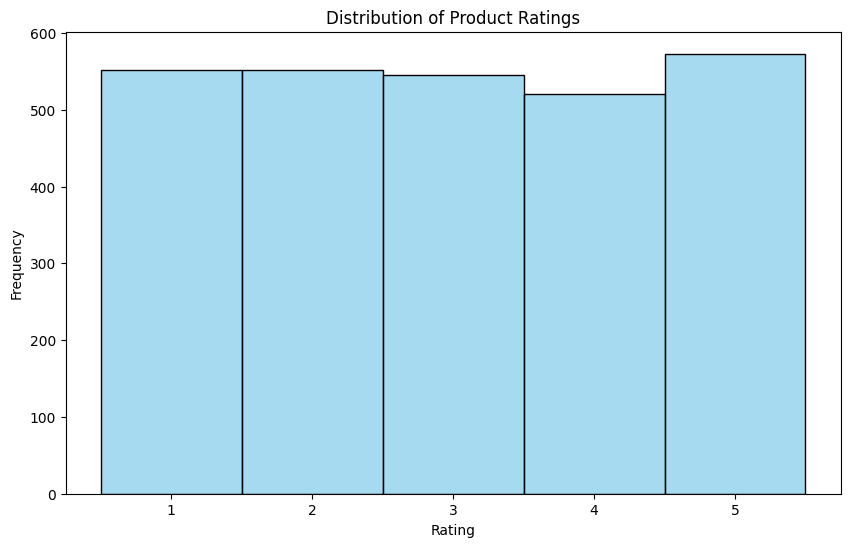

<ipython-input-9-db6050844b49>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.values, y=average_ratings.index, palette='viridis')


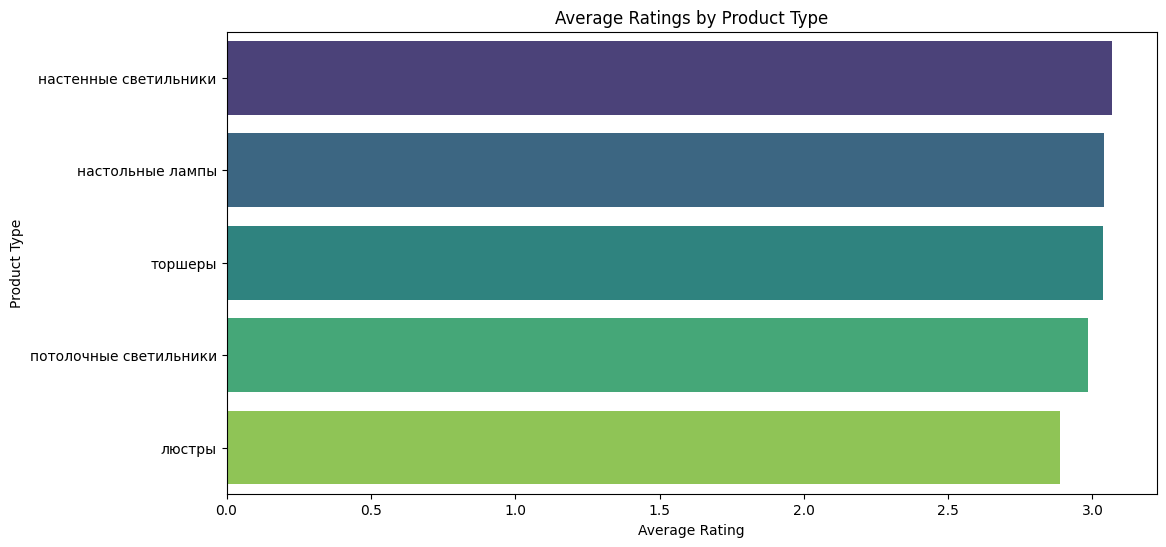

,Оценка товара
Тип светильника,
настенные светильники,3.068441
настольные лампы,3.040280
торшеры,3.037244
потолочные светильники,2.986111
люстры,2.887430


In [9]:
import seaborn as sns

# Analyze the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Оценка товара'], bins=5, discrete=True, kde=False, color='skyblue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['1', '2', '3', '4', '5'])
plt.show()

# Calculate average ratings by product type
average_ratings = sales_data.groupby('Тип светильника')['Оценка товара'].mean().sort_values(ascending=False)

# Plot average ratings by product type
plt.figure(figsize=(12, 6))
sns.barplot(x=average_ratings.values, y=average_ratings.index, palette='viridis')
plt.title('Average Ratings by Product Type')
plt.xlabel('Average Rating')
plt.ylabel('Product Type')
plt.show()

average_ratings

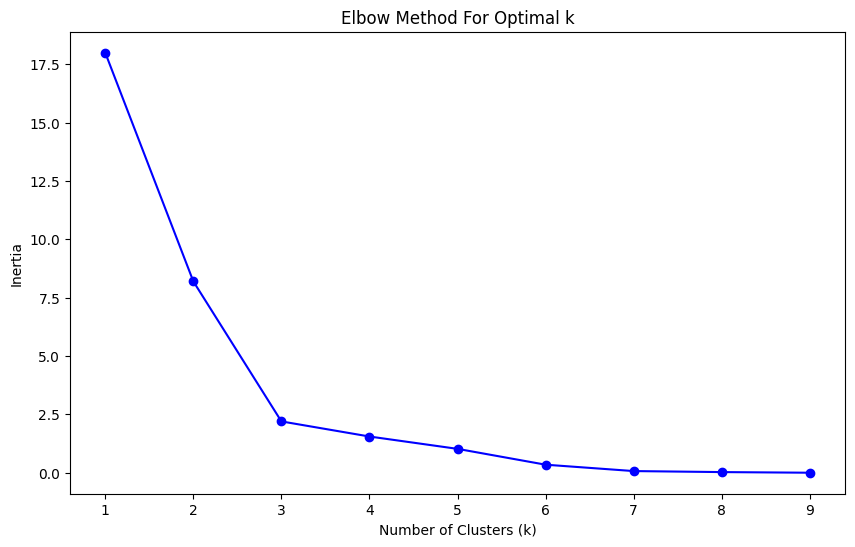

,Cluster,Общая стоимость,Количество проданных единиц
0,0,1.012607e+07,1952.00
1,1,8.252734e+06,1582.75
2,2,9.028085e+06,1699.00


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering
# For simplicity, let's use the total amount spent and the number of purchases
customer_data = sales_data.groupby('Пользователь').agg({
    'Общая стоимость': 'sum',
    'Количество проданных единиц': 'sum'
}).reset_index()

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Общая стоимость', 'Количество проданных единиц']])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with the optimal number of clusters
optimal_k = 3  # Example choice based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Analyze the clusters
cluster_analysis = customer_data.groupby('Cluster').agg({
    'Общая стоимость': 'mean',
    'Количество проданных единиц': 'mean'
}).reset_index()

cluster_analysis

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Prepare the data for demand forecasting
# Aggregate sales data by date and product type
demand_data = sales_data.groupby(['Дата продажи', 'Тип светильника']).agg({
    'Количество проданных единиц': 'sum'
}).reset_index()

# Create lag features for time series forecasting
demand_data['Lag_1'] = demand_data.groupby('Тип светильника')['Количество проданных единиц'].shift(1)
demand_data['Lag_7'] = demand_data.groupby('Тип светильника')['Количество проданных единиц'].shift(7)
demand_data['Lag_30'] = demand_data.groupby('Тип светильника')['Количество проданных единиц'].shift(30)

# Drop null values resulting from lag creation
demand_data = demand_data.dropna()

# Define features and target variable
X = demand_data[['Lag_1', 'Lag_7', 'Lag_30']]
y = demand_data['Количество проданных единиц']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using RMSE
rmse_demand = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_demand

6.609599328381932

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd

# Assuming demand_data is your DataFrame with 'Date', 'ProductType', and 'QuantitySold'
demand_data['Lag_1'] = demand_data.groupby('ProductType')['QuantitySold'].shift(1)
demand_data['Lag_7'] = demand_data.groupby('ProductType')['QuantitySold'].shift(7)
demand_data['Lag_30'] = demand_data.groupby('ProductType')['QuantitySold'].shift(30)

# Drop null values resulting from lag creation
demand_data = demand_data.dropna()

# Define features and target variable
X = demand_data[['Lag_1', 'Lag_7', 'Lag_30']]
y = demand_data['QuantitySold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using RMSE
rmse_demand = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse_demand}')


KeyError: 'ProductType'